In [1]:
from sklearn.datasets import make_regression
bias=100
X, y, w=make_regression(
 n_samples=200, n_features=1, bias=bias, noise=10,
coef=True, random_state=1
)
print(X[:5])
print(y[:5])
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
86.44794300545998


In [2]:
#사이킷런 패키지의 회귀분석 함수
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X, y)
#절편(상수항), 가중치(기울기)
print(model.intercept_, model.coef_)

99.79150868986945 [86.96171201]


In [3]:
#새로운 입력값에 대한 예측(2차원 배열로 입력해야 함)
model.predict([[-2], [-1], [0], [1], [2]])

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [4]:
print(X.flatten()[:5])
print(y[:5])

[ 0.23249456 -0.03869551  0.5505375   0.50318481  2.18697965]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]


In [6]:
import pandas as pd
df=pd.DataFrame({'x':X.flatten(), 'y':y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [7]:
import statsmodels.api as sm
X=df[["x"]]
y=df[["y"]]
#최소자승법(OLS, Ordinary Least Squares)
model=sm.OLS(y, X)
result=model.fit() # 학습
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              167.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    3.66e-28
Time:                        12:48:54   Log-Likelihood:                         -1204.0
No. Observations:                 200   AIC:                                      2410.
Df Residuals:                     199   BIC:                                      2413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.6428      7.706     12.931      0.000      84.448     114.838
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.415
Skew:                           0.079   Prob(JB):                        0.813
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#새로운 값 예측
result.predict([-2, -1, 0, 1, 2])

array([-199.28565959,  -99.64282979,    0.        ,   99.64282979,
        199.28565959])

In [9]:
#가중치(기울기)
result.params

x    99.64283
dtype: float64

In [10]:
# 잔차(실제값과 예측값의 차이)
result.resid

0      104.712602
1       96.888644
2      107.000394
3       91.553292
4       65.343279
          ...    
195    105.055511
196    105.871796
197     70.418046
198     99.984395
199    100.673331
Length: 200, dtype: float64

Text(0, 0.5, 'Residual')

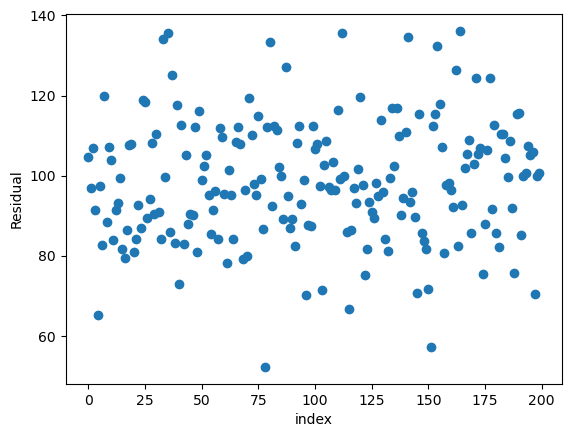

In [11]:
#잔차 벡터 그래프
%matplotlib inline
import matplotlib.pyplot as plt
result.resid.plot(style="o")
plt.xlabel("index")
plt.ylabel("Residual")